<a href="https://colab.research.google.com/github/Vedika2203/GRIP-TSF-Internship/blob/main/Task_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exploratory Data Analysis - Terrorism

-Data processing-

In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
!pip install folium

In [2]:
import folium
from folium.plugins import MarkerCluster

In [5]:
df = pd.read_csv("/content/globalterrorismdb_0718dist.csv",encoding='latin1')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,76,94,96) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1,0,NaN,NaN,1,1,1,-9,NaN,NaN,0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7316 entries, 0 to 7315
Columns: 135 entries, eventid to related
dtypes: float64(63), int64(18), object(54)
memory usage: 7.5+ MB


In [9]:
df.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,alternative,multiple,success,suicide,attacktype1,attacktype2,attacktype3,targtype1,targsubtype1,natlty1,targtype2,targsubtype2,natlty2,targtype3,targsubtype3,natlty3,gsubname2,gname3,gsubname3,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,...,claimmode,claim2,claimmode2,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weapsubtype1,weaptype2,weapsubtype2,weaptype3,weapsubtype3,weaptype4,weapsubtype4,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propvalue,ishostkid,nhostkid,nhostkidus,nhours,ndays,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,7.316000e+03,7316.000000,7316.000000,7316.000000,7316.000000,7316.000000,7316.000000,7133.000000,7133.000000,7316.000000,7316.000000,7316.000000,7316.000000,7316.000000,7316.000000,924.000000,7316.000000,7316.000000,7316.0,7316.000000,18.000000,2.000000,7316.000000,6897.000000,7296.000000,109.000000,84.000000,94.000000,10.000000,7.000000,10.000000,0.0,0.0,0.0,7315.000000,11.000000,0.0,7315.000000,1845.000000,854.000000,...,215.000000,7.000000,6.000000,0.0,0.0,0.0,14.000000,7315.000000,5927.000000,325.000000,295.000000,19.000000,17.000000,3.000000,3.0,6507.000000,1144.000000,1145.000000,5273.000000,1119.000000,1072.000000,7315.000000,3448.000000,2.287000e+03,7190.000000,580.000000,580.000000,211.000000,185.000000,7098.000000,2.300000e+02,1.0,7.200000e+01,0.0,371.000000,280.000000,7315.000000,7315.000000,7315.000000,7315.000000
mean,1.975070e+11,1975.003417,6.523237,15.129579,0.029251,238.453390,5.899125,34.842112,-22.783191,1.139284,0.005467,0.997266,0.987015,0.909650,-1.257654,1.372294,0.064243,0.905686,0.0,3.236195,4.222222,3.000000,6.410197,38.516746,167.188596,9.807339,51.904762,213.202128,3.900000,33.000000,182.600000,NaN,NaN,NaN,0.024197,0.545455,NaN,0.002734,-33.888347,-83.175644,...,4.441860,0.857143,3.333333,NaN,NaN,NaN,0.357143,6.551606,11.912435,6.393846,11.542373,7.157895,11.176471,7.000000,16.0,0.785923,0.166958,0.234061,1.061255,0.388740,0.025187,0.550649,3.243039,1.354194e+05,0.080668,-1.463793,0.186207,-1.468009,35.929730,0.032544,6.014240e+06,20000.0,1.566266e+06,NaN,2.865229,6.428571,-3.135885,-3.064252,0.409706,-1.596719
std,2.676603e+08,2.675243,3.477868,9.053688,0.168521,194.540953,3.290733,22.248928,52.465516,0.700851,0.073745,0.052217,0.113218,0.286702,3.316879,0.639890,0.245202,0.292285,0.0,1.983729,2.462795,1.414214,5.890827,29.433240,77.622528,6.756995,27.205430,66.378449,4.148628,20.116328,58.621574,NaN,NaN,NaN,0.153670,0.522233,NaN,0.052221,50.888233,36.709206,...,2.920299,0.377964,3.265986,NaN,NaN,NaN,0.497245,2.113969,7.022859,1.681038,7.225997,2.544344,9.248211,1.732051,5.0,6.264323,1.079966,2.649593,7.851273,2.541234,0.245063,1.093145,0.469039,1.143578e+06,0.272343,66.295438,4.869256,15.685806,81.055942,0.177453,6.622020e+07,NaN,5.339688e+06,NaN,1.302037,24.729981,4.423057,4.486479,0.662392,4.131260
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-45.867889,-157.818968,1.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,0.000000,0.000000,0.0,1.000000,2.000000,2.000000,1.000000,1.000000,5.000000,1.000000,1.000000,30.000000,1.000000,8.000000,53.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,0.000000,-99.000000,-99.000000,...,1.000000,0.000000,2.000000,NaN,NaN,NaN,0.000000,2.000000,1.000000,2.000000,2.000000,5.000000,2.000000,6.000000,11.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,2.000000,-9.900000e+01,0.000000,-99.000000,-99.000000,-99.000000,0.000000,0.000000,0.000000e+00,20000.0,0.000000e+00,NaN,2.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.973041e+11,1973.000000,3.000000,7.000000,0.000000,98.000000,2.000000,33.888523,-73.931351,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.0,2.000000,2.000000,2.500000,1.000000,15.000000

In [10]:
df.corr()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,alternative,multiple,success,suicide,attacktype1,attacktype2,attacktype3,targtype1,targsubtype1,natlty1,targtype2,targsubtype2,natlty2,targtype3,targsubtype3,natlty3,gsubname2,gname3,gsubname3,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,...,claimmode,claim2,claimmode2,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weapsubtype1,weaptype2,weapsubtype2,weaptype3,weapsubtype3,weaptype4,weapsubtype4,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propvalue,ishostkid,nhostkid,nhostkidus,nhours,ndays,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
eventid,1.000000,0.999915,0.045565,-0.027407,-0.021290,-0.229719,0.253971,-0.067495,0.260474,0.074050,0.000130,-0.033278,-0.005739,0.074374,-0.153124,-0.114219,-0.103827,0.087108,NaN,-0.002935,-0.009789,1.0,-0.014451,-0.012530,-0.295920,0.035018,0.031588,-0.066362,-0.184400,-0.006697,-0.052240,NaN,NaN,NaN,-0.105084,-0.134430,NaN,-0.001971,0.530538,0.134746,...,-0.047970,0.956741,1.000000,NaN,NaN,NaN,1.639902e-02,0.040701,-0.150615,-0.110499,0.067106,-0.321536,-0.294573,0.509711,0.011250,0.016795,0.031152,0.072213,0.009193,0.001661,0.096894,0.128108,0.008409,-0.001266,0.027158,0.039686,0.016216,-0.012285,0.093247,0.004613,0.076574,NaN,-0.080264,NaN,0.091293,-0.176293,0.062468,0.059688,-0.113371,0.023213
iyear,0.999915,1.000000,0.032573,-0.028284,-0.021448,-0.230060,0.253480,-0.067212,0.259973,0.073897,-0.000095,-0.033206,-0.005721,0.074370,-0.153084,-0.113953,-0.104118,0.086953,NaN,-0.002342,-0.006075,1.0,-0.014307,-0.012392,-0.295610,0.036920,0.034171,-0.066287,-0.182144,-0.008466,-0.056084,NaN,NaN,NaN,-0.104939,-0.149071,NaN,-0.002014,0.530158,0.134828,...,-0.048766,0.954786,1.000000,NaN,NaN,NaN,-2.528089e-17,0.040847,-0.149986,-0.109579,0.068785,-0.321496,-0.295774,0.500000,0.000000,0.016603,0.030453,0.071677,0.008926,0.001162,0.096771,0.128086,0.008887,-0.001523,0.027132,0.039786,0.016144,-0.009703,0.091371,0.004741,0.077428,NaN,-0.083767,NaN,0.090494,-0.176159,0.061752,0.058993,-0.114092,0.022338
imonth,0.045565,0.032573,1.000000,0.040242,0.010969,0.016156,0.047267,-0.024611,0.047423,0.014348,0.016028,-0.007178,-0.001490,0.003545,-0.008766,-0.028547,0.017326,0.016008,NaN,-0.044230,-0.278096,NaN,-0.012212,-0.011221,-0.036159,-0.146864,-0.204701,-0.002710,-0.146694,0.132069,0.274591,NaN,NaN,NaN,-0.015798,0.602688,NaN,0.001897,0.107617,0.018327,...,0.057708,0.975076,-1.000000,NaN,NaN,NaN,6.929275e-01,-0.007315,-0.055662,-0.072388,-0.115413,0.044059,0.048657,-0.327327,0.188982,0.015473,0.064494,0.057388,0.021926,0.043918,0.026056,0.006559,-0.038026,0.018677,0.003054,-0.007506,0.004456,-0.186774,0.135634,-0.009805,-0.059508,NaN,0.237643,NaN,0.063107,-0.027012,0.057191,0.055475,0.049954,0.067743
iday,-0.027407,-0.028284,0.040242,1.000000,0.008715,0.028581,-0.004636,0.000091,0.003442,-0.002392,0.008562,0.012605,-0.003026,-0.004284,-0.003372,-0.037161,0.032089,-0.021986,NaN,-0.062194,-0.043218,-1.0,0.022705,0.004786,0.005946,-0.129421,-0.054611,-0.102777,-0.524585,-0.339069,-0.523193,NaN,NaN,NaN,-0.002266,-0.375378,NaN,-0.006537,-0.024435,-0.033214,...,0.101330,-0.258199,-0.090351,NaN,NaN,NaN,-5.576317e-01,-0.037222,-0.029442,0.031468,0.029534,0.276913,0.101715,0.725059,0.972263,0.000346,-0.001549,0.024837,-0.006328,-0.014535,0.030582,0.001039,-0.026729,-0.002091,-0.000104,0.043787,0.045730,-0.037872,0.044336,0.003625,0.003381,NaN,0.019929,NaN,0.066707,-0.044613,0.017506,0.016366,0.038677,0.036825
extended,-0.021290,-0.021448,0.010969,0.008715,1.000000,-0.120801,-0.026972,-0.165211,-0.014179,0.109025,-0.001870,-0.021982,0.019910,0.032071,-0.024179,-0.028179,-0.022324,0.053241,NaN,0.208332,0.336473,NaN,-0.041007,-0.035115,-0.029181,0.018958,0.010502,-0.166028,0.177858,0.197284,-0.776792,NaN,NaN,NaN,-0.022057,NaN,NaN,0.021981,0.216539,0.104154,...,0.188444,NaN,NaN,NaN,NaN,

In [12]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

-Visualisation-

1. Injuries in the US attacks

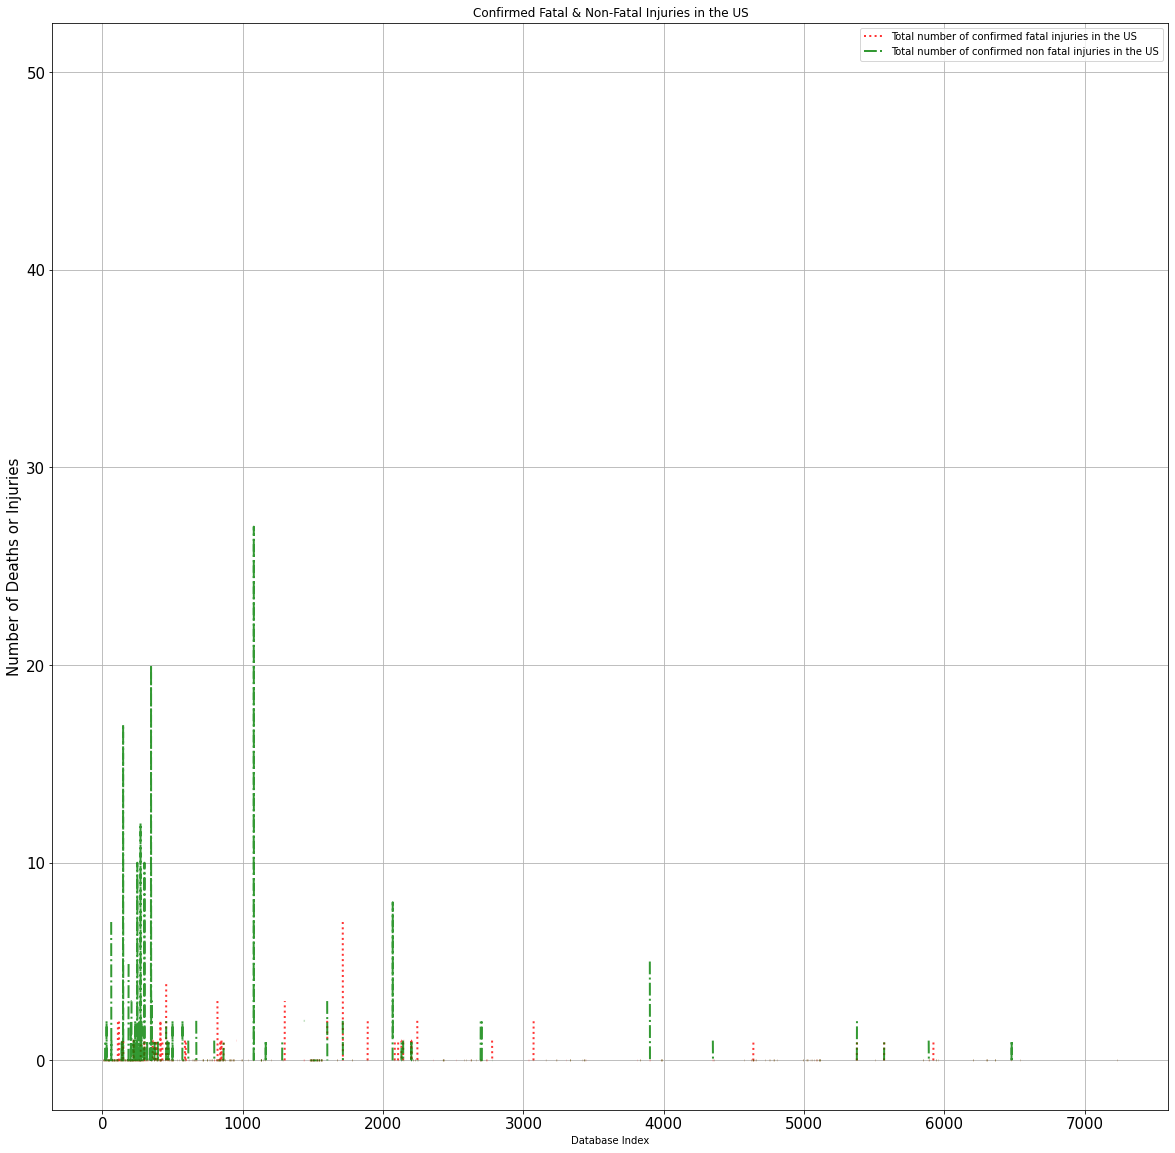

In [22]:
df.nkillus.plot(kind = 'line', color = 'red', label = 'Total number of confirmed fatal injuries in the US', linewidth = 2, alpha = 0.8, grid = True, 
                 linestyle = ':', figsize = (20,20), fontsize=15)
df.nwoundus.plot(color = "green", label = 'Total number of confirmed non fatal injuries in the US', linewidth = 2, alpha = 0.8, grid = True, 
                 linestyle = '-.', figsize = (20,20), fontsize=15)

plt.legend(loc='upper right') #legend = puts label into plot
plt.xlabel('Database Index', fontsize=10) #label = name of label
plt.ylabel('Number of Deaths or Injuries', fontsize=15)

plt.title('Confirmed Fatal & Non-Fatal Injuries in the US') #plot title
plt.show()

People killed and Injured

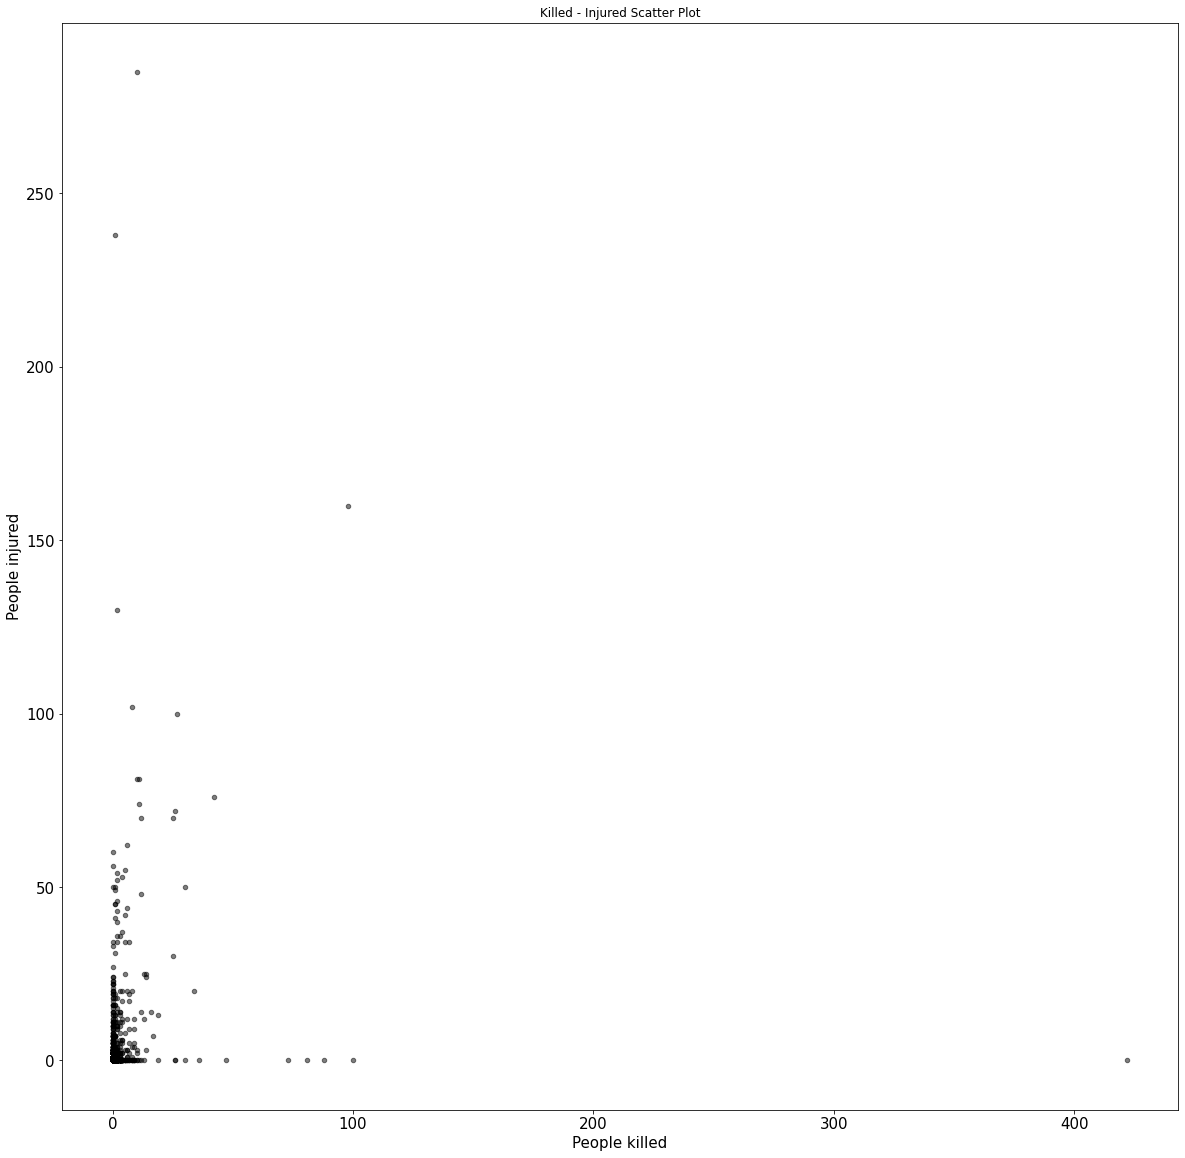

In [27]:
df.plot(kind = 'scatter', x = 'nkill', y = 'nwound', alpha = 0.5, color = 'black', figsize = (20,20), fontsize=15)
plt.xlabel('People killed', fontsize=15)
plt.ylabel('People injured', fontsize=15)
plt.title('Killed - Injured Scatter Plot')
plt.show()

In majority of the attack cases the killed and injured ratio is less or moderate. Accept for some cases where people killed crosses 400 while people injured crossed 250.

Terrorist activities in Middle East and Northern regions of Africa

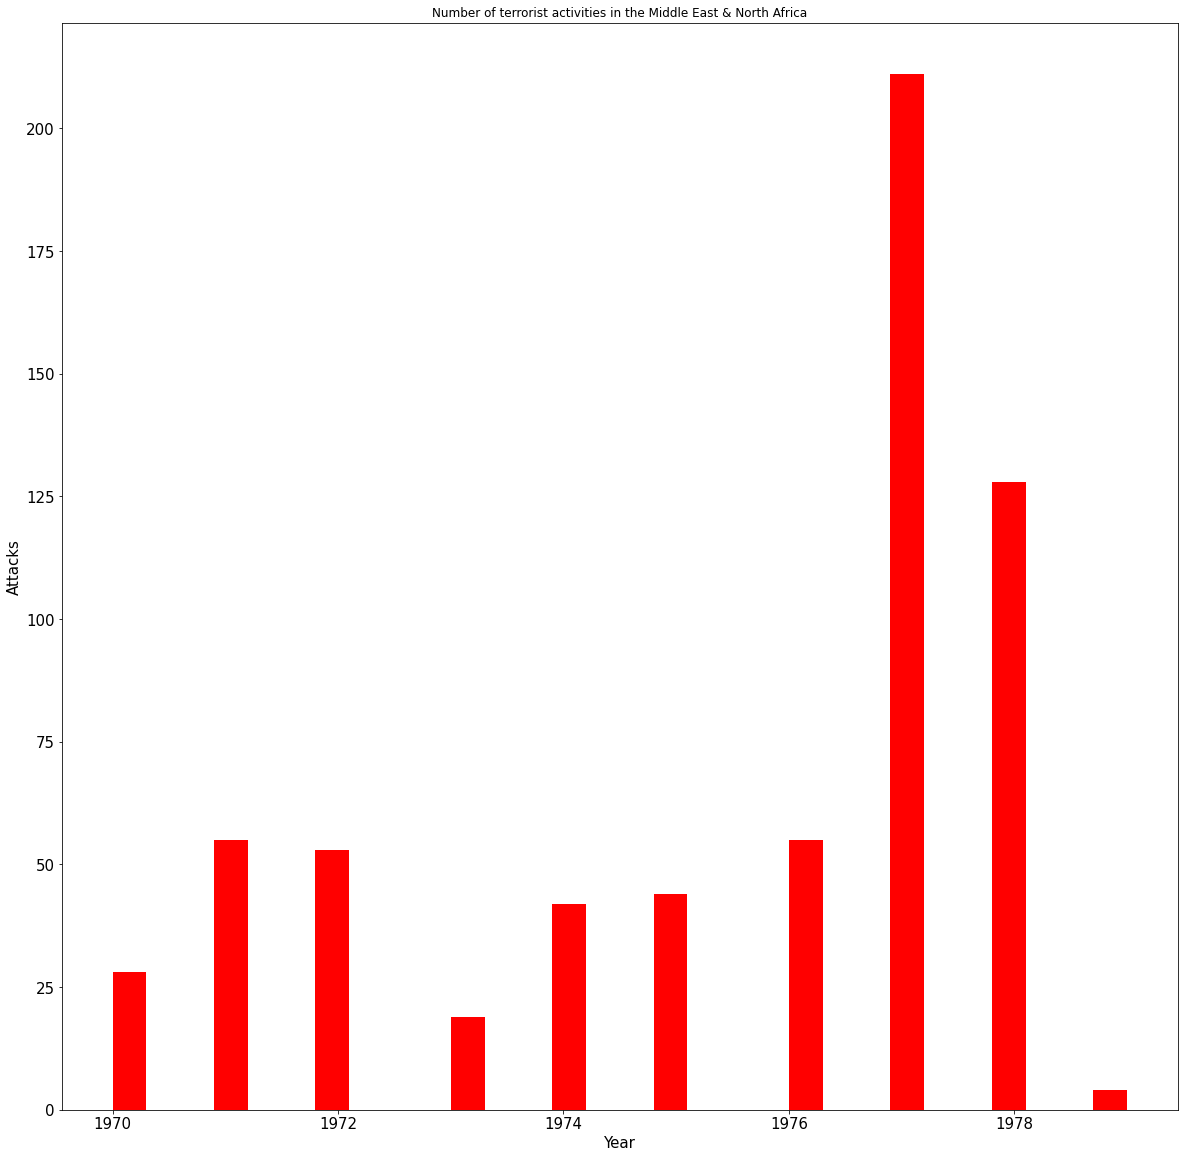

In [31]:
middleEastData = df[df['region'] == 10]
middleEastData.iyear.plot(kind = 'hist', bins = 30, figsize = (20,20), color = 'red', fontsize=15)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Attacks', fontsize=15)
plt.title('Number of terrorist activities in the Middle East & North Africa')
plt.show()

The frequency of terrorist attacks have increased as years progress

Terrorist activities for certain years and regions

In [32]:
filterYear = df['iyear'] == 1970

In [37]:
filterData = df[filterYear] #filter data
#filterData.info()
reqFilterData = filterData.loc[:,'city':'longitude'] #Collecting the required fields
reqFilterData = reqFilterData.dropna() #removing the NaN values in latitude and longitude dataset
reqFilterDataList = reqFilterData.values.tolist()
#reqFilterDataList

In [40]:
map = folium.Map(location = [0, 30], tiles='CartoDB positron', zoom_start=2) #clustered marker
markerCluster = folium.plugins.MarkerCluster().add_to(map)
for point in range(0, len(reqFilterDataList)):
    folium.Marker(location=[reqFilterDataList[point][1],reqFilterDataList[point][2]], popup = reqFilterDataList[point][0]).add_to(markerCluster)
map

Total number of deaths in attacks

In [42]:
killData = df.loc[:,'nkill']
print('Number of deaths in terrorist attack:', int(sum(killData.dropna())))# drop the NaN values

Number of deaths in terrorist attack: 5114


Types of attacks

In [43]:
attackData = df.loc[:,'attacktype1':'attacktype1_txt']
# attackData
typeKillData = pd.concat([attackData, killData], axis=1)

In [44]:
typeKillFormatData = typeKillData.pivot_table(columns='attacktype1_txt', values='nkill', aggfunc='sum')
typeKillFormatData

attacktype1_txt,Armed Assault,Assassination,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Unarmed Assault,Unknown
nkill,1050.0,1484.0,1568.0,454.0,175.0,177.0,113.0,8.0,85.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  """


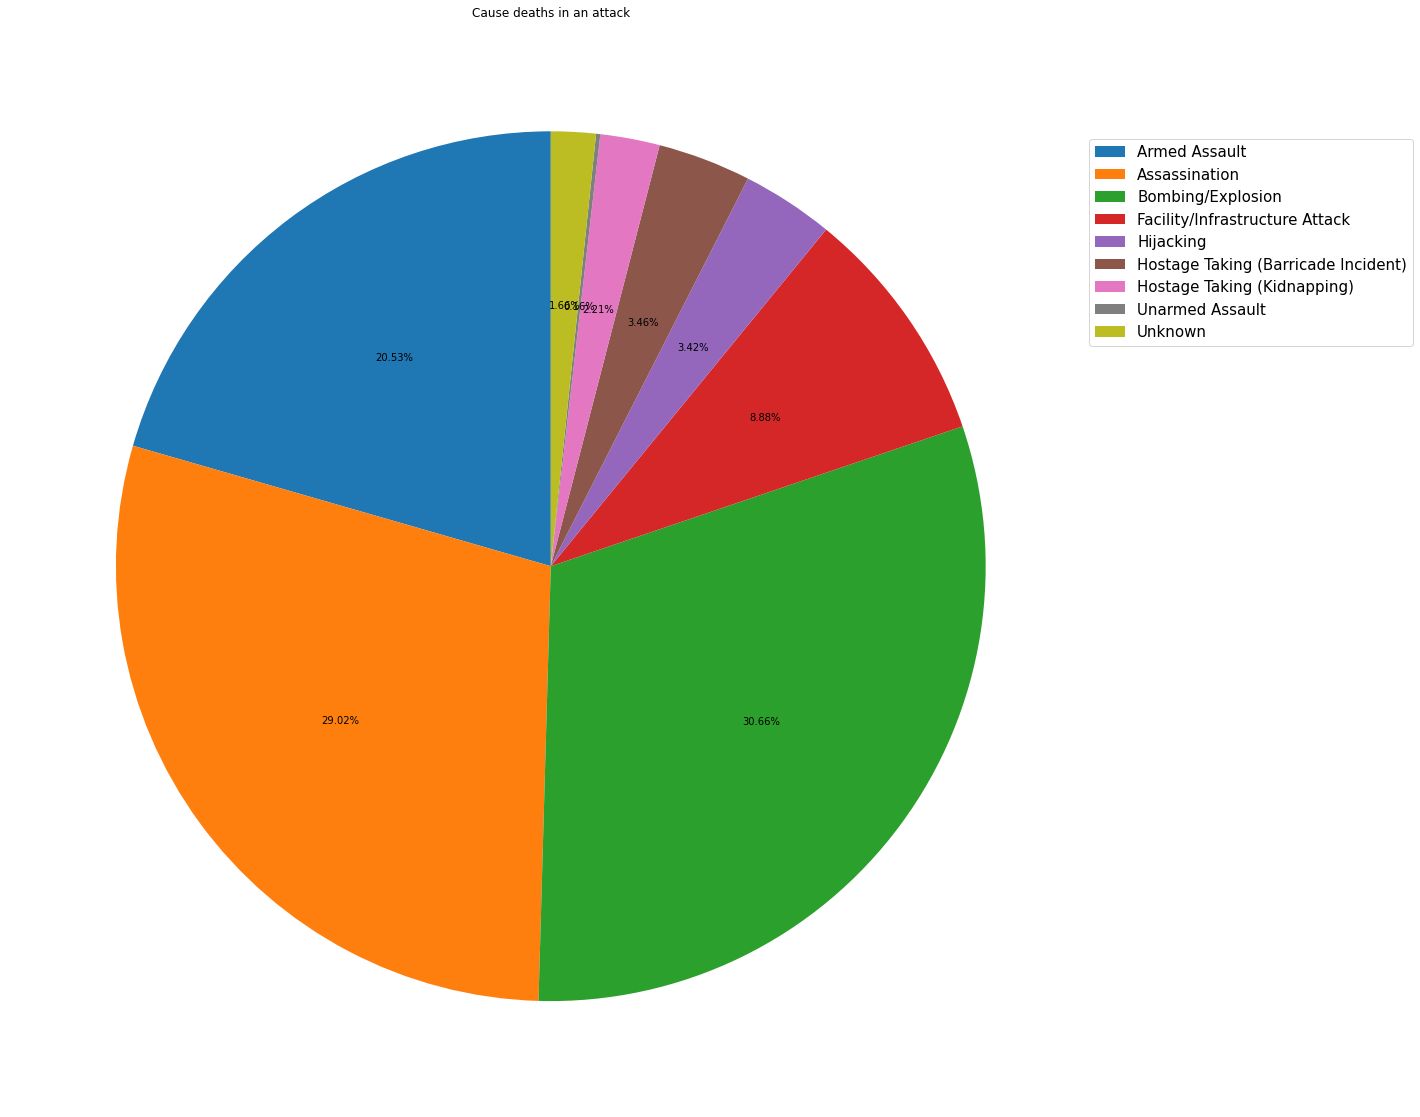

In [47]:
labels = typeKillFormatData.columns.tolist() #convert line to list
transpoze = typeKillFormatData.T #transpose
values = transpoze.values.tolist()
fig, ax = plt.subplots(figsize=(20, 20), subplot_kw=dict(aspect="equal"))
plt.pie(values, startangle=90, autopct='%.2f%%')
plt.title('Cause deaths in an attack')
plt.legend(labels, loc='upper right', bbox_to_anchor = (1.3, 0.9), fontsize=15) #location legend
plt.show()

Bombing and explosions have been the most massive cause of deaths. Following which assassination has been the most prominant cause.

Number of people killed in an terrorist acttack country-wise

In [51]:
countryData = df.loc[:,'country':'country_txt'] #countyData
countryKillData = pd.concat([countryData, killData], axis=1)

In [49]:
countryKillFormatData = countryKillData.pivot_table(columns='country_txt', values='nkill', aggfunc='sum')
countryKillFormatData

country_txt,Afghanistan,Algeria,Andorra,Angola,Argentina,Australia,Austria,Bahamas,Bangladesh,Barbados,Belgium,Bolivia,Botswana,Brazil,Brunei,Cambodia,Canada,Chad,Chile,Colombia,Costa Rica,Cyprus,Czechoslovakia,Denmark,Djibouti,Dominican Republic,East Germany (GDR),Ecuador,Egypt,El Salvador,Ethiopia,France,Greece,Guatemala,Guyana,Haiti,Honduras,India,Indonesia,Iran,...,North Yemen,Pakistan,Panama,Paraguay,People's Republic of the Congo,Peru,Philippines,Poland,Portugal,Rhodesia,Saudi Arabia,Singapore,Somalia,South Africa,South Korea,South Vietnam,South Yemen,Soviet Union,Spain,Sri Lanka,Sudan,Sweden,Switzerland,Syria,Taiwan,Tanzania,Thailand,Trinidad and Tobago,Turkey,United Arab Emirates,United Kingdom,United States,Uruguay,Venezuela,West Bank and Gaza Strip,West Germany (FRG),Western Sahara,Yugoslavia,Zaire,Zambia
nkill,0.0,0.0,0.0,0.0,317.0,3.0,9.0,0.0,0.0,73.0,1.0,0.0,1.0,3.0,0.0,4.0,2.0,0.0,0.0,135.0,0.0,17.0,26.0,0.0,1.0,4.0,1.0,4.0,4.0,42.0,34.0,43.0,115.0,74.0,5.0,0.0,0.0,4.0,1.0,469.0,...,2.0,11.0,0.0,2.0,0.0,0.0,228.0,0.0,3.0,93.0,0.0,0.0,0.0,13.0,1.0,81.0,0.0,4.0,209.0,1.0,3.0,4.0,47.0,7.0,25.0,0.0,32.0,0.0,80.0,7.0,1638.0,164.0,4.0,2.0,9.0,44.0,0.0,2.0,1.0,5.0


In [52]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=25
fig_size[1]=25
plt.rcParams["figure.figsize"] = fig_size

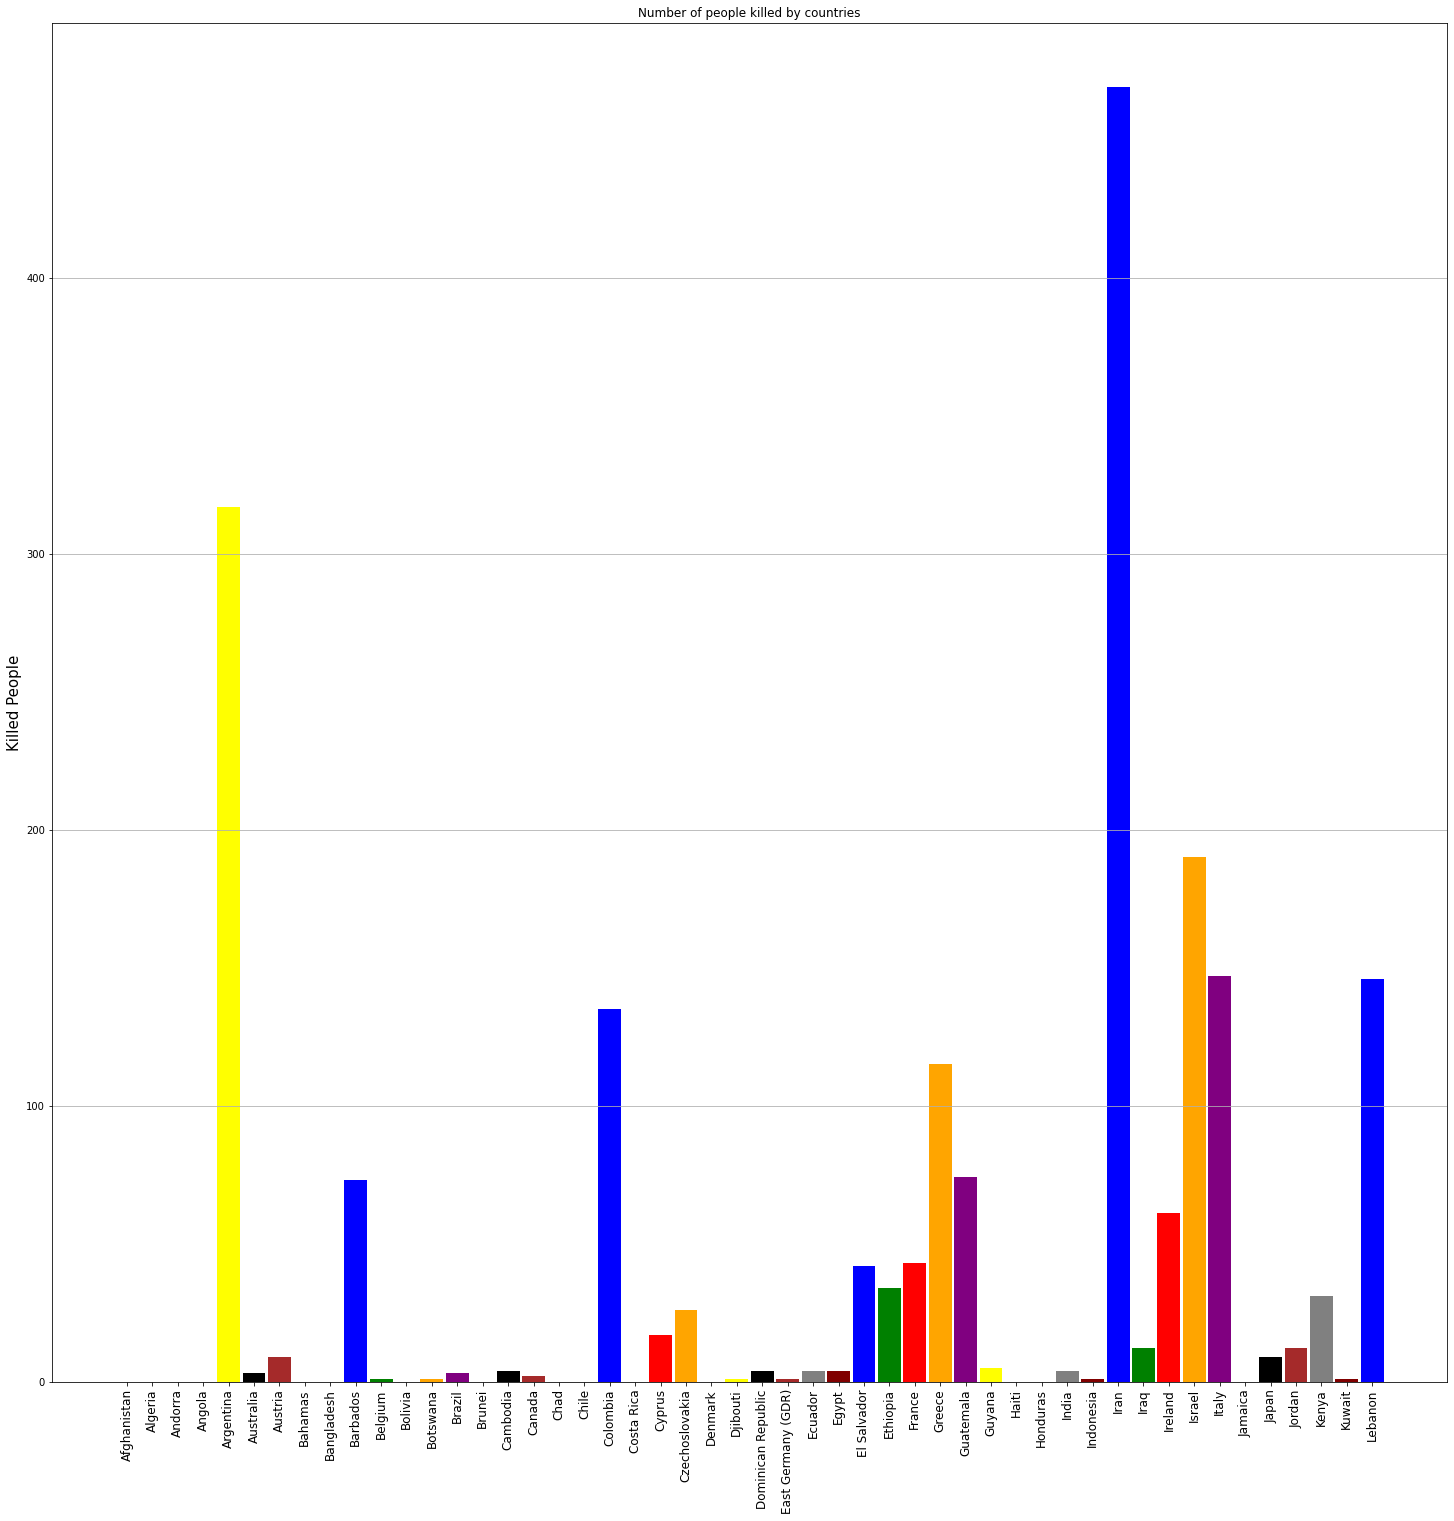

In [56]:
labels = countryKillFormatData.columns.tolist()
labels = labels[:50] #50 bar provides nice view
index = np.arange(len(labels))
transpoze = countryKillFormatData.T
values = transpoze.values.tolist()
values = values[:50]
values = [int(i[0]) for i in values] #convert float to int
colors = ['green', 'red', 'orange', 'purple', 'yellow', 'black', 'brown', 'gray', 'maroon', 'blue'] #color list for bar chart bar color 
fig, ax = plt.subplots(1, 1)
ax.yaxis.grid(True)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=25
fig_size[1]=25
plt.rcParams["figure.figsize"] = fig_size
plt.bar(index, values, color = colors, width = 0.9)
plt.ylabel('Killed People', fontsize=15)
plt.xticks(index, labels, fontsize=12, rotation=90)
plt.title('Number of people killed by countries')
#print(fig_size)
plt.show()

Middle east has seen the most attacks where Iran leads the chart.